In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
%matplotlib inline

In [19]:
X, y = make_classification(n_samples=100, n_features=3, n_redundant=0, n_informative=2,
                           random_state=2, n_clusters_per_class=1)

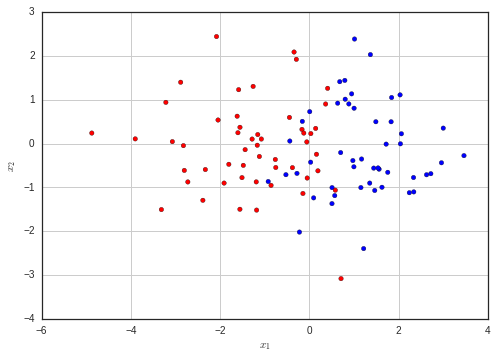

In [20]:
sns.set(style="white")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(["#FF0000", "#0000FF"]))
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [36]:
def knn_weights(h):
    def fun(distances):
        return np.exp(-2*np.power(distances/h, 2))
    return fun

    

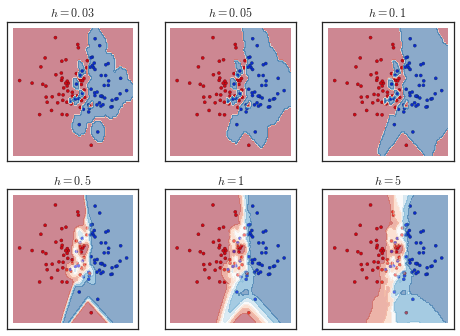

In [58]:
h = [0.03, 0.05, 0.1, 0.5, 1, 5]
n_neibors = 5
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

for i, window in enumerate(h):
    ax = plt.subplot(2, 3, i + 1)
    clf = KNeighborsClassifier(n_neibors, weights=knn_weights(window)).fit(X[:, :-1], y)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    ax.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap=ListedColormap(["#FF0000", "#0000FF"]))
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.5)
    ax.set_title("$h = {}$".format(window))
    ax.set_xticks(())
    ax.set_yticks(())
plt.savefig('knn.pdf')

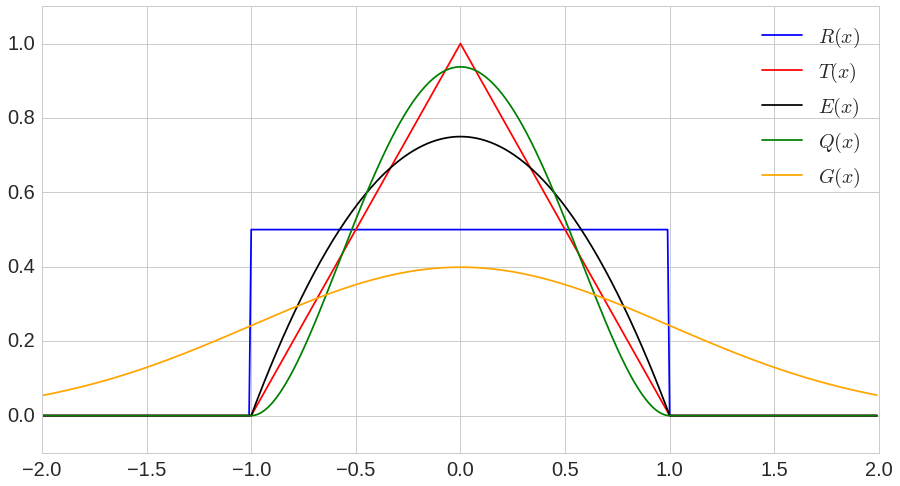

In [96]:
def H(x):
    return np.array([0 if xi <=0 else 1 for xi in x])

x = np.arange(-2, 2, 0.01)
plt.figure(figsize=(15,8))
sns.set(font_scale=2)
sns.set_style("whitegrid")
plt.plot(x, 0.5*(H(x + 1) - H(x - 1)), label='$R(x)$', color='blue')
plt.plot(x, (1 - np.abs(x))*(H(x + 1) - H(x - 1)), label='$T(x)$', color='red')
plt.plot(x, 0.75*(1 - np.power(x, 2))*(H(x + 1) - H(x - 1)), label='$E(x)$', color='black')
plt.plot(x, 15.0/16.0*np.power(1 - np.power(x, 2), 2)*(H(x + 1) - H(x - 1)), label='$Q(x)$', color='green')
plt.plot(x, 1/np.sqrt(2*np.pi)*np.exp(-np.power(x, 2)/2), label='$G(x)$', color='orange')
plt.ylim((-0.1, 1.1))
plt.legend()

plt.savefig('../fig/cores.pdf')